In [1]:
!pip install graphviz

In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [8]:
# fetch data 
airline_data = pd.read_csv('flight_dataset_2022_23.csv')
#flight_data = pd.read_csv('On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_12.csv')
airline_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time (Minutes),Destination Airport,Scheduled departure time,Scheduled elapsed time (Minutes),Arrival_time,departure_time,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.code,weather.icon,weather.description,wind_dir,wind_gust_spd,wind_spd,Location,app_temp_des,azimuth_des,clouds_des,dewpt_des,dhi_des,dni_des,elev_angle_des,ghi_des,pod_des,precip_rate_des,pres_des,revision_status_des,rh_des,slp_des,snow_rate_des,solar_rad_des,temp_des,timestamp_local_des,timestamp_utc_des,ts_des,uv_des,vis_des,weather.icon_des,weather.description_des,weather.code_des,wind_dir_des,wind_gust_spd_des,wind_spd_des,Location_des
0,9E,1/1/23,5190,N325PQ,JFK,22:41:00,91,SYR,21:10:00,91,1/1/23 22:45,1/1/23 21:15,4.80,314.50,100,3.30,0,0,-66.20,0,n,0.00,1016,final,76,1017,0.00,0,7.20,1/1/23 22:45,1/2/23 3:45,1672631100,0.00,16,Overcast clouds,804,c04n,230,5.20,3.60,JFK,3.40,285.80,100,1.80,0,0,-49.10,0,n,0.00,1000,final,88,1015,0.00,0,3.60,1/1/23 21:15,1/2/23 2:15,1672625700,0.00,12,804,c04n,Overcast clouds,300,2.20,0.90,SYR
1,9E,1/2/22,5531,N678CA,JFK,14:12:00,77,SYR,12:55:00,77,1/2/22 14:15,1/2/22 13:00,14.70,212.90,93,11.80,77,674,18.80,290,d,0.00,1002,final,83,1003,0.00,76,14.70,1/2/22 14:15,1/2/22 19:15,1641150900,0.60,16,804,c04d,Overcast clouds,255,9.00,4.84,JFK,-10.90,192.90,100,-6.20,86,736,22.90,365,d,0.00,994,final,91,1009,0.00,123,-5.00,1/2/22 13:00,1/2/22 18:00,1641146400,0.60,8,c04d,Overcast clouds,804,280,9.20,4.59,SYR
2,9E,1/2/23,5190,N195PQ,JFK,22:41:00,91,SYR,21:10:00,91,1/2/23 22:45,1/2/23 21:15,9.40,314.40,100,8.20,0,0,-66.10,0,n,0.00,1020,final,92,1021,0.00,0,9.40,1/2/23 22:45,1/3/23 3:45,1672717500,0.00,16,Overcast clouds,804,c04n,160,3.40,2.50,JFK,5.80,285.80,100,0.90,0,0,-48.90,0,n,0.00,1005,final,78,1021,0.00,0,4.40,1/2/23 21:15,1/3/23 2:15,1672712100,0.00,16,804,c04n,Overcast clouds,60,2.40,0.37,SYR
3,9E,1/3/22,5531,N602LR,JFK,14:12:00,77,SYR,12:55:00,77,1/3/22 14:15,1/3/22 13:00,-8.60,212.80,100,-10.70,78,676,19.00,292,d,0.88,1015,final,49,1016,14.88,107,-1.40,1/3/22 14:15,1/3/22 19:15,1641237300,0.50,16,600,s01d,Light snow,360,11.80,9.05,JFK,-13.00,192.80,87,-14.40,86,738,23.00,367,d,0.00,1009,final,59,1025,0.00,161,-7.80,1/3/22 13:00,1/3/22 18:00,1641232800,0.80,16,c04d,Overcast clouds,804,310,7.60,3.10,SYR
4,9E,1/3/23,5190,N303PQ,JFK,22:41:00,91,SYR,21:10:00,91,1/3/23 22:45,1/3/23 21:15,8.30,314.40,100,7.70,0,0,-65.90,0,n,0.00,1009,final,96,1009,0.00,0,8.30,1/3/23 22:45,1/4/23 3:45,1672803900,0.00,8,Overcast clouds,804,c04n,180,9.20,2.10,JFK,3.80,285.80,100,3.80,0,0,-48.80,0,n,0.00,991,final,92,1006,0.00,0,5.00,1/3/23 21:15,1/4/23 2:15,1672798500,0.00,9,804,c04n,Overcast clouds,145,4.60,1.65,SYR


In [7]:
pd.set_option('display.max_columns', None)

In [5]:
airline_data.shape

(5623, 70)

In [6]:
pd.set_option('display.max_columns', None)
airline_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Scheduled Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Destination Airport',
       'Scheduled departure time', 'Scheduled elapsed time (Minutes)',
       'Arrival_time', 'departure_time', 'app_temp', 'azimuth', 'clouds',
       'dewpt', 'dhi', 'dni', 'elev_angle', 'ghi', 'pod', 'precip_rate',
       'pres', 'revision_status', 'rh', 'slp', 'snow_rate', 'solar_rad',
       'temp', 'timestamp_local', 'timestamp_utc', 'ts', 'uv', 'vis',
       'weather.code', 'weather.icon', 'weather.description', 'wind_dir',
       'wind_gust_spd', 'wind_spd', 'Location', 'app_temp_des', 'azimuth_des',
       'clouds_des', 'dewpt_des', 'dhi_des', 'dni_des', 'elev_angle_des',
       'ghi_des', 'pod_des', 'precip_rate_des', 'pres_des',
       'revision_status_des', 'rh_des', 'slp_des', 'snow_rate_des',
       'solar_rad_des', 'temp_des', 'timestamp_local_des', 'timestamp_utc_des',
       'ts_

In [7]:
OP_CARRIER_unique_values = airline_data['Carrier Code'].unique()
print(OP_CARRIER_unique_values)

['9E' 'MQ' 'B6' 'WN' 'UA']


In [8]:
airline_data.isna().sum()

Carrier Code          0
Date (MM/DD/YYYY)     0
Flight Number         0
Tail Number          11
Origin Airport        0
                     ..
weather.code_des      0
wind_dir_des          0
wind_gust_spd_des     0
wind_spd_des          0
Location_des          0
Length: 90, dtype: int64

In [9]:
airline_data.dropna(inplace=True)

In [10]:
airline_data.isna().sum()

Carrier Code         0
Date (MM/DD/YYYY)    0
Flight Number        0
Tail Number          0
Origin Airport       0
                    ..
weather.code_des     0
wind_dir_des         0
wind_gust_spd_des    0
wind_spd_des         0
Location_des         0
Length: 90, dtype: int64

In [11]:
airline_data['Arrival Delay (Minutes)']=airline_data['Arrival Delay (Minutes)'].astype(np.int64)

In [12]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5612 entries, 0 to 5622
Data columns (total 90 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Carrier Code                                5612 non-null   object 
 1   Date (MM/DD/YYYY)                           5612 non-null   object 
 2   Flight Number                               5612 non-null   float64
 3   Tail Number                                 5612 non-null   object 
 4   Origin Airport                              5612 non-null   object 
 5   Scheduled Arrival Time                      5612 non-null   object 
 6   Actual Arrival Time                         5612 non-null   object 
 7   Scheduled Elapsed Time (Minutes)            5612 non-null   float64
 8   Actual Elapsed Time (Minutes)               5612 non-null   float64
 9   Arrival Delay (Minutes)                     5612 non-null   int64  
 10  Wheels-on Time   

In [14]:
def set_dependent_variable(time):
    if time<-5:
        return 'Early'
    elif (time>=-5 and time<=5):
        return 'On-time'
    else:
        return 'Late'

In [15]:
airline_data['Status']=airline_data['Arrival Delay (Minutes)'].apply(set_dependent_variable)

In [16]:
airline_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Scheduled Arrival Time', 'Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)_x', 'Delay Weather (Minutes)_x',
       'Delay National Aviation System (Minutes)_x',
       'Delay Security (Minutes)_x', 'Delay Late Aircraft Arrival (Minutes)_x',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)',
       'Delay Carrier (Minutes)_y', 'Delay Weather (Minutes)_y',
       'Delay National Aviation System (Minutes)_y',
       'Delay Security (Minutes)_y', 'Delay Late Aircraft Arrival (Minutes)_y',
       'Arrival_time', 'departure_time', 'app_temp',

In [17]:
airline_data.isna().sum()

Carrier Code         0
Date (MM/DD/YYYY)    0
Flight Number        0
Tail Number          0
Origin Airport       0
                    ..
wind_dir_des         0
wind_gust_spd_des    0
wind_spd_des         0
Location_des         0
Status               0
Length: 91, dtype: int64

In [18]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [19]:
airline_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Scheduled Arrival Time', 'Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)_x', 'Delay Weather (Minutes)_x',
       'Delay National Aviation System (Minutes)_x',
       'Delay Security (Minutes)_x', 'Delay Late Aircraft Arrival (Minutes)_x',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)',
       'Delay Carrier (Minutes)_y', 'Delay Weather (Minutes)_y',
       'Delay National Aviation System (Minutes)_y',
       'Delay Security (Minutes)_y', 'Delay Late Aircraft Arrival (Minutes)_y',
       'Arrival_time', 'departure_time', 'app_temp',

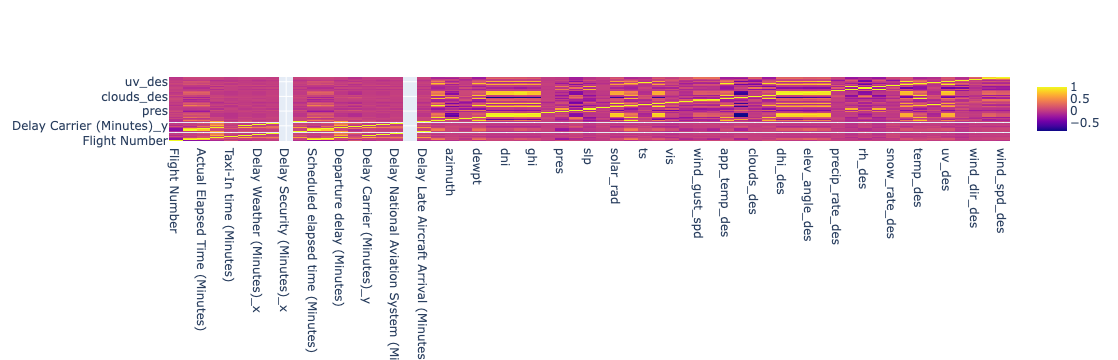

In [21]:
numeric_columns = airline_data.select_dtypes(include=['float64', 'int64'])

correl = numeric_columns.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='Airline data heatmap')

In [22]:
airline_data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Scheduled Arrival Time', 'Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)_x', 'Delay Weather (Minutes)_x',
       'Delay National Aviation System (Minutes)_x',
       'Delay Security (Minutes)_x', 'Delay Late Aircraft Arrival (Minutes)_x',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)',
       'Delay Carrier (Minutes)_y', 'Delay Weather (Minutes)_y',
       'Delay National Aviation System (Minutes)_y',
       'Delay Security (Minutes)_y', 'Delay Late Aircraft Arrival (Minutes)_y',
       'Arrival_time', 'departure_time', 'app_temp',

In [25]:
airline_data.drop(columns=['Carrier Code',  'Tail Number','Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)_x', 'Delay Weather (Minutes)_x',
       'Delay National Aviation System (Minutes)_x',
       'Delay Security (Minutes)_x', 'Delay Late Aircraft Arrival (Minutes)_x', 'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)',
       'Delay Carrier (Minutes)_y', 'Delay Weather (Minutes)_y',
       'Delay National Aviation System (Minutes)_y',
       'Delay Security (Minutes)_y', 'Delay Late Aircraft Arrival (Minutes)_y',],inplace=True)
airline_data.head()

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Destination Airport,Scheduled departure time,Arrival_time,departure_time,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.code,weather.icon,weather.description,wind_dir,wind_gust_spd,wind_spd,Location,app_temp_des,azimuth_des,clouds_des,dewpt_des,dhi_des,dni_des,elev_angle_des,ghi_des,pod_des,precip_rate_des,pres_des,revision_status_des,rh_des,slp_des,snow_rate_des,solar_rad_des,temp_des,timestamp_local_des,timestamp_utc_des,ts_des,uv_des,vis_des,weather.icon_des,weather.description_des,weather.code_des,wind_dir_des,wind_gust_spd_des,wind_spd_des,Location_des,Status
0,2023-01-01,"5,190.00",JFK,22:41:00,SYR,21:10:00,2023-01-01 22:45:00,2023-01-01 21:15:00,4.80,314.50,100,3.30,0,0,-66.20,0,n,0.00,1016,final,76,1017,0.00,0,7.20,2023-01-01 22:45:00,2023-01-02 03:45:00,1672631100,0.00,16,Overcast clouds,804,c04n,230,5.20,3.60,JFK,3.40,285.80,100,1.80,0,0,-49.10,0,n,0.00,1000,final,88,1015,0.00,0,3.60,2023-01-01 21:15:00,2023-01-02 02:15:00,1672625700,0.00,12,804,c04n,Overcast clouds,300,2.20,0.90,SYR,Early
1,2022-01-02,"5,531.00",JFK,14:12:00,SYR,12:55:00,2022-01-02 14:15:00,2022-01-02 13:00:00,14.70,212.90,93,11.80,77,674,18.80,290,d,0.00,1002,final,83,1003,0.00,76,14.70,2022-01-02 14:15:00,2022-01-02 19:15:00,1641150900,0.60,16,804,c04d,Overcast clouds,255,9.00,4.84,JFK,-10.90,192.90,100,-6.20,86,736,22.90,365,d,0.00,994,final,91,1009,0.00,123,-5.00,2022-01-02 13:00:00,2022-01-02 18:00:00,1641146400,0.60,8,c04d,Overcast clouds,804,280,9.20,4.59,SYR,Late
2,2023-01-02,"5,190.00",JFK,22:41:00,SYR,21:10:00,2023-01-02 22:45:00,2023-01-02 21:15:00,9.40,314.40,100,8.20,0,0,-66.10,0,n,0.00,1020,final,92,1021,0.00,0,9.40,2023-01-02 22:45:00,2023-01-03 03:45:00,1672717500,0.00,16,Overcast clouds,804,c04n,160,3.40,2.50,JFK,5.80,285.80,100,0.90,0,0,-48.90,0,n,0.00,1005,final,78,1021,0.00,0,4.40,2023-01-02 21:15:00,2023-01-03 02:15:00,1672712100,0.00,16,804,c04n,Overcast clouds,60,2.40,0.37,SYR,On-time
3,2022-01-03,"5,531.00",JFK,14:12:00,SYR,12:55:00,2022-01-03 14:15:00,2022-01-03 13:00:00,-8.60,212.80,100,-10.70,78,676,19.00,292,d,0.88,1015,final,49,1016,14.88,107,-1.40,2022-01-03 14:15:00,2022-01-03 19:15:00,1641237300,0.50,16,600,s01d,Light snow,360,11.80,9.05,JFK,-13.00,192.80,87,-14.40,86,738,23.00,367,d,0.00,1009,final,59,1025,0.00,161,-7.80,2022-01-03 13:00:00,2022-01-03 18:00:00,1641232800,0.80,16,c04d,Overcast clouds,804,310,7.60,3.10,SYR,Late
4,2023-01-03,"5,190.00",JFK,22:41:00,SYR,21:10:00,2023-01-03 22:45:00,2023-01-03 21:15:00,8.30,314.40,100,7.70,0,0,-65.90,0,n,0.00,1009,final,96,1009,0.00,0,8.30,2023-01-03 22:45:00,2023-01-04 03:45:00,1672803900,0.00,8,Overcast clouds,804,c04n,180,9.20,2.10,JFK,3.80,285.80,100,3.80,0,0,-48.80,0,n,0.00,991,final,92,1006,0.00,0,5.00,2023-01-03 21:15:00,2023-01-04 02:15:00,1672798500,0.00,9,804,c04n,Overcast clouds,145,4.60,1.65,SYR,Early


In [26]:
airline_data.columns

Index(['Date (MM/DD/YYYY)', 'Flight Number', 'Origin Airport',
       'Scheduled Arrival Time', 'Destination Airport',
       'Scheduled departure time', 'Arrival_time', 'departure_time',
       'app_temp', 'azimuth', 'clouds', 'dewpt', 'dhi', 'dni', 'elev_angle',
       'ghi', 'pod', 'precip_rate', 'pres', 'revision_status', 'rh', 'slp',
       'snow_rate', 'solar_rad', 'temp', 'timestamp_local', 'timestamp_utc',
       'ts', 'uv', 'vis', 'weather.code', 'weather.icon',
       'weather.description', 'wind_dir', 'wind_gust_spd', 'wind_spd',
       'Location', 'app_temp_des', 'azimuth_des', 'clouds_des', 'dewpt_des',
       'dhi_des', 'dni_des', 'elev_angle_des', 'ghi_des', 'pod_des',
       'precip_rate_des', 'pres_des', 'revision_status_des', 'rh_des',
       'slp_des', 'snow_rate_des', 'solar_rad_des', 'temp_des',
       'timestamp_local_des', 'timestamp_utc_des', 'ts_des', 'uv_des',
       'vis_des', 'weather.icon_des', 'weather.description_des',
       'weather.code_des', 'wind_dir

In [27]:
len(airline_data.columns)

67

In [28]:
airline_data.drop(columns=['Arrival_time', 'departure_time', 'timestamp_local', 'timestamp_utc', 
                           'Location', 'timestamp_local_des', 'timestamp_utc_des', 'Location_des'], inplace=True)
airline_data.head()

,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Destination Airport,Scheduled departure time,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,ts,uv,vis,weather.code,weather.icon,weather.description,wind_dir,wind_gust_spd,wind_spd,app_temp_des,azimuth_des,clouds_des,dewpt_des,dhi_des,dni_des,elev_angle_des,ghi_des,pod_des,precip_rate_des,pres_des,revision_status_des,rh_des,slp_des,snow_rate_des,solar_rad_des,temp_des,ts_des,uv_des,vis_des,weather.icon_des,weather.description_des,weather.code_des,wind_dir_des,wind_gust_spd_des,wind_spd_des,Status
0,2023-01-01,"5,190.00",JFK,22:41:00,SYR,21:10:00,4.80,314.50,100,3.30,0,0,-66.20,0,n,0.00,1016,final,76,1017,0.00,0,7.20,1672631100,0.00,16,Overcast clouds,804,c04n,230,5.20,3.60,3.40,285.80,100,1.80,0,0,-49.10,0,n,0.00,1000,final,88,1015,0.00,0,3.60,1672625700,0.00,12,804,c04n,Overcast clouds,300,2.20,0.90,Early
1,2022-01-02,"5,531.00",JFK,14:12:00,SYR,12:55:00,14.70,212.90,93,11.80,77,674,18.80,290,d,0.00,1002,final,83,1003,0.00,76,14.70,1641150900,0.60,16,804,c04d,Overcast clouds,255,9.00,4.84,-10.90,192.90,100,-6.20,86,736,22.90,365,d,0.00,994,final,91,1009,0.00,123,-5.00,1641146400,0.60,8,c04d,Overcast clouds,804,280,9.20,4.59,Late
2,2023-01-02,"5,190.00",JFK,22:41:00,SYR,21:10:00,9.40,314.40,100,8.20,0,0,-66.10,0,n,0.00,1020,final,92,1021,0.00,0,9.40,1672717500,0.00,16,Overcast clouds,804,c04n,160,3.40,2.50,5.80,285.80,100,0.90,0,0,-48.90,0,n,0.00,1005,final,78,1021,0.00,0,4.40,1672712100,0.00,16,804,c04n,Overcast clouds,60,2.40,0.37,On-time
3,2022-01-03,"5,531.00",JFK,14:12:00,SYR,12:55:00,-8.60,212.80,100,-10.70,78,676,19.00,292,d,0.88,1015,final,49,1016,14.88,107,-1.40,1641237300,0.50,16,600,s01d,Light snow,360,11.80,9.05,-13.00,192.80,87,-14.40,86,738,23.00,367,d,0.00,1009,final,59,1025,0.00,161,-7.80,1641232800,0.80,16,c04d,Overcast clouds,804,310,7.60,3.10,Late
4,2023-01-03,"5,190.00",JFK,22:41:00,SYR,21:10:00,8.30,314.40,100,7.70,0,0,-65.90,0,n,0.00,1009,final,96,1009,0.00,0,8.30,1672803900,0.00,8,Overcast clouds,804,c04n,180,9.20,2.10,3.80,285.80,100,3.80,0,0,-48.80,0,n,0.00,991,final,92,1006,0.00,0,5.00,1672798500,0.00,9,804,c04n,Overcast clouds,145,4.60,1.65,Early


In [30]:
weather_data = pd.read_csv('weather_data.csv')
weather_data.head()

/var/folders/kv/s4mg_r2n60q37wmj416xrvl40000gn/T/ipykernel_63636/1536165799.py:1: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.code,weather.icon,weather.description,wind_dir,wind_gust_spd,wind_spd,Location
0,0,-8.90,3.60,25,-6.30,0,0,-71.00,0,n,0.00,984,final,84,1010,0.00,0,-4.00,2020-01-01 00:00:00,2020-01-01 06:00:00,1577858400,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
1,1,-9.00,12.90,25,-6.40,0,0,-69.90,0,n,0.00,984,final,84,1010,0.00,0,-4.20,2020-01-01 00:15:00,2020-01-01 06:15:00,1577859300,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
2,2,-9.20,22.10,25,-6.60,0,0,-68.90,0,n,0.00,984,final,84,1010,0.00,0,-4.30,2020-01-01 00:30:00,2020-01-01 06:30:00,1577860200,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
3,3,-9.40,31.40,25,-6.80,0,0,-67.80,0,n,0.00,984,final,83,1010,0.00,0,-4.40,2020-01-01 00:45:00,2020-01-01 06:45:00,1577861100,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
4,4,-9.30,40.60,25,-6.80,0,0,-66.70,0,n,0.00,984,final,84,1010,0.00,0,-4.50,2020-01-01 01:00:00,2020-01-01 07:00:00,1577862000,0.00,16,802,c02n,Scattered clouds,270,6.40,3.35,ORD


In [31]:
weather_data[weather_data['ts']== 1672631100]

,Unnamed: 0,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.code,weather.icon,weather.description,wind_dir,wind_gust_spd,wind_spd,Location
105303,105303,2.60,295.40,100,2.10,0,0,-56.80,0,n,0.00,992,final,88,1017,0.00,0,3.90,2023-01-01 21:45:00,2023-01-02 03:45:00,1672631100,0.00,5,c04n,Overcast clouds,804,265,3.30,1.60,ORD
254967,254967,4.80,314.50,100,3.30,0,0,-66.20,0,n,0.00,1016,final,76,1017,0.00,0,7.20,2023-01-01 22:45:00,2023-01-02 03:45:00,1672631100,0.00,16,Overcast clouds,804,c04n,230,5.20,3.60,JFK
404627,404627,18.90,277.80,31,17.20,0,0,-66.00,0,n,0.00,1018,final,92,1022,0.00,0,18.60,2023-01-01 22:45:00,2023-01-02 03:45:00,1672631100,0.00,16,802,c02n,Scattered clouds,65,3.20,2.22,MCO
